# Linear Regression on Boston Dataset for the Data Analytics Session
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2022-04-16
---

> <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.



---

The Boston dataset contains a total of 506 cases.
There are 14 attributes in each case of the dataset. They are:

**Input**
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
**Output**
14. MEDV - Median value of owner-occupied homes in $1000's

## 1) To load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



---



## 2) To load data and check

In [ ]:
df = pd.read_csv('https://rathachai.github.io/DA101/data/boston.csv')

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




---



## 3) To do data exploration

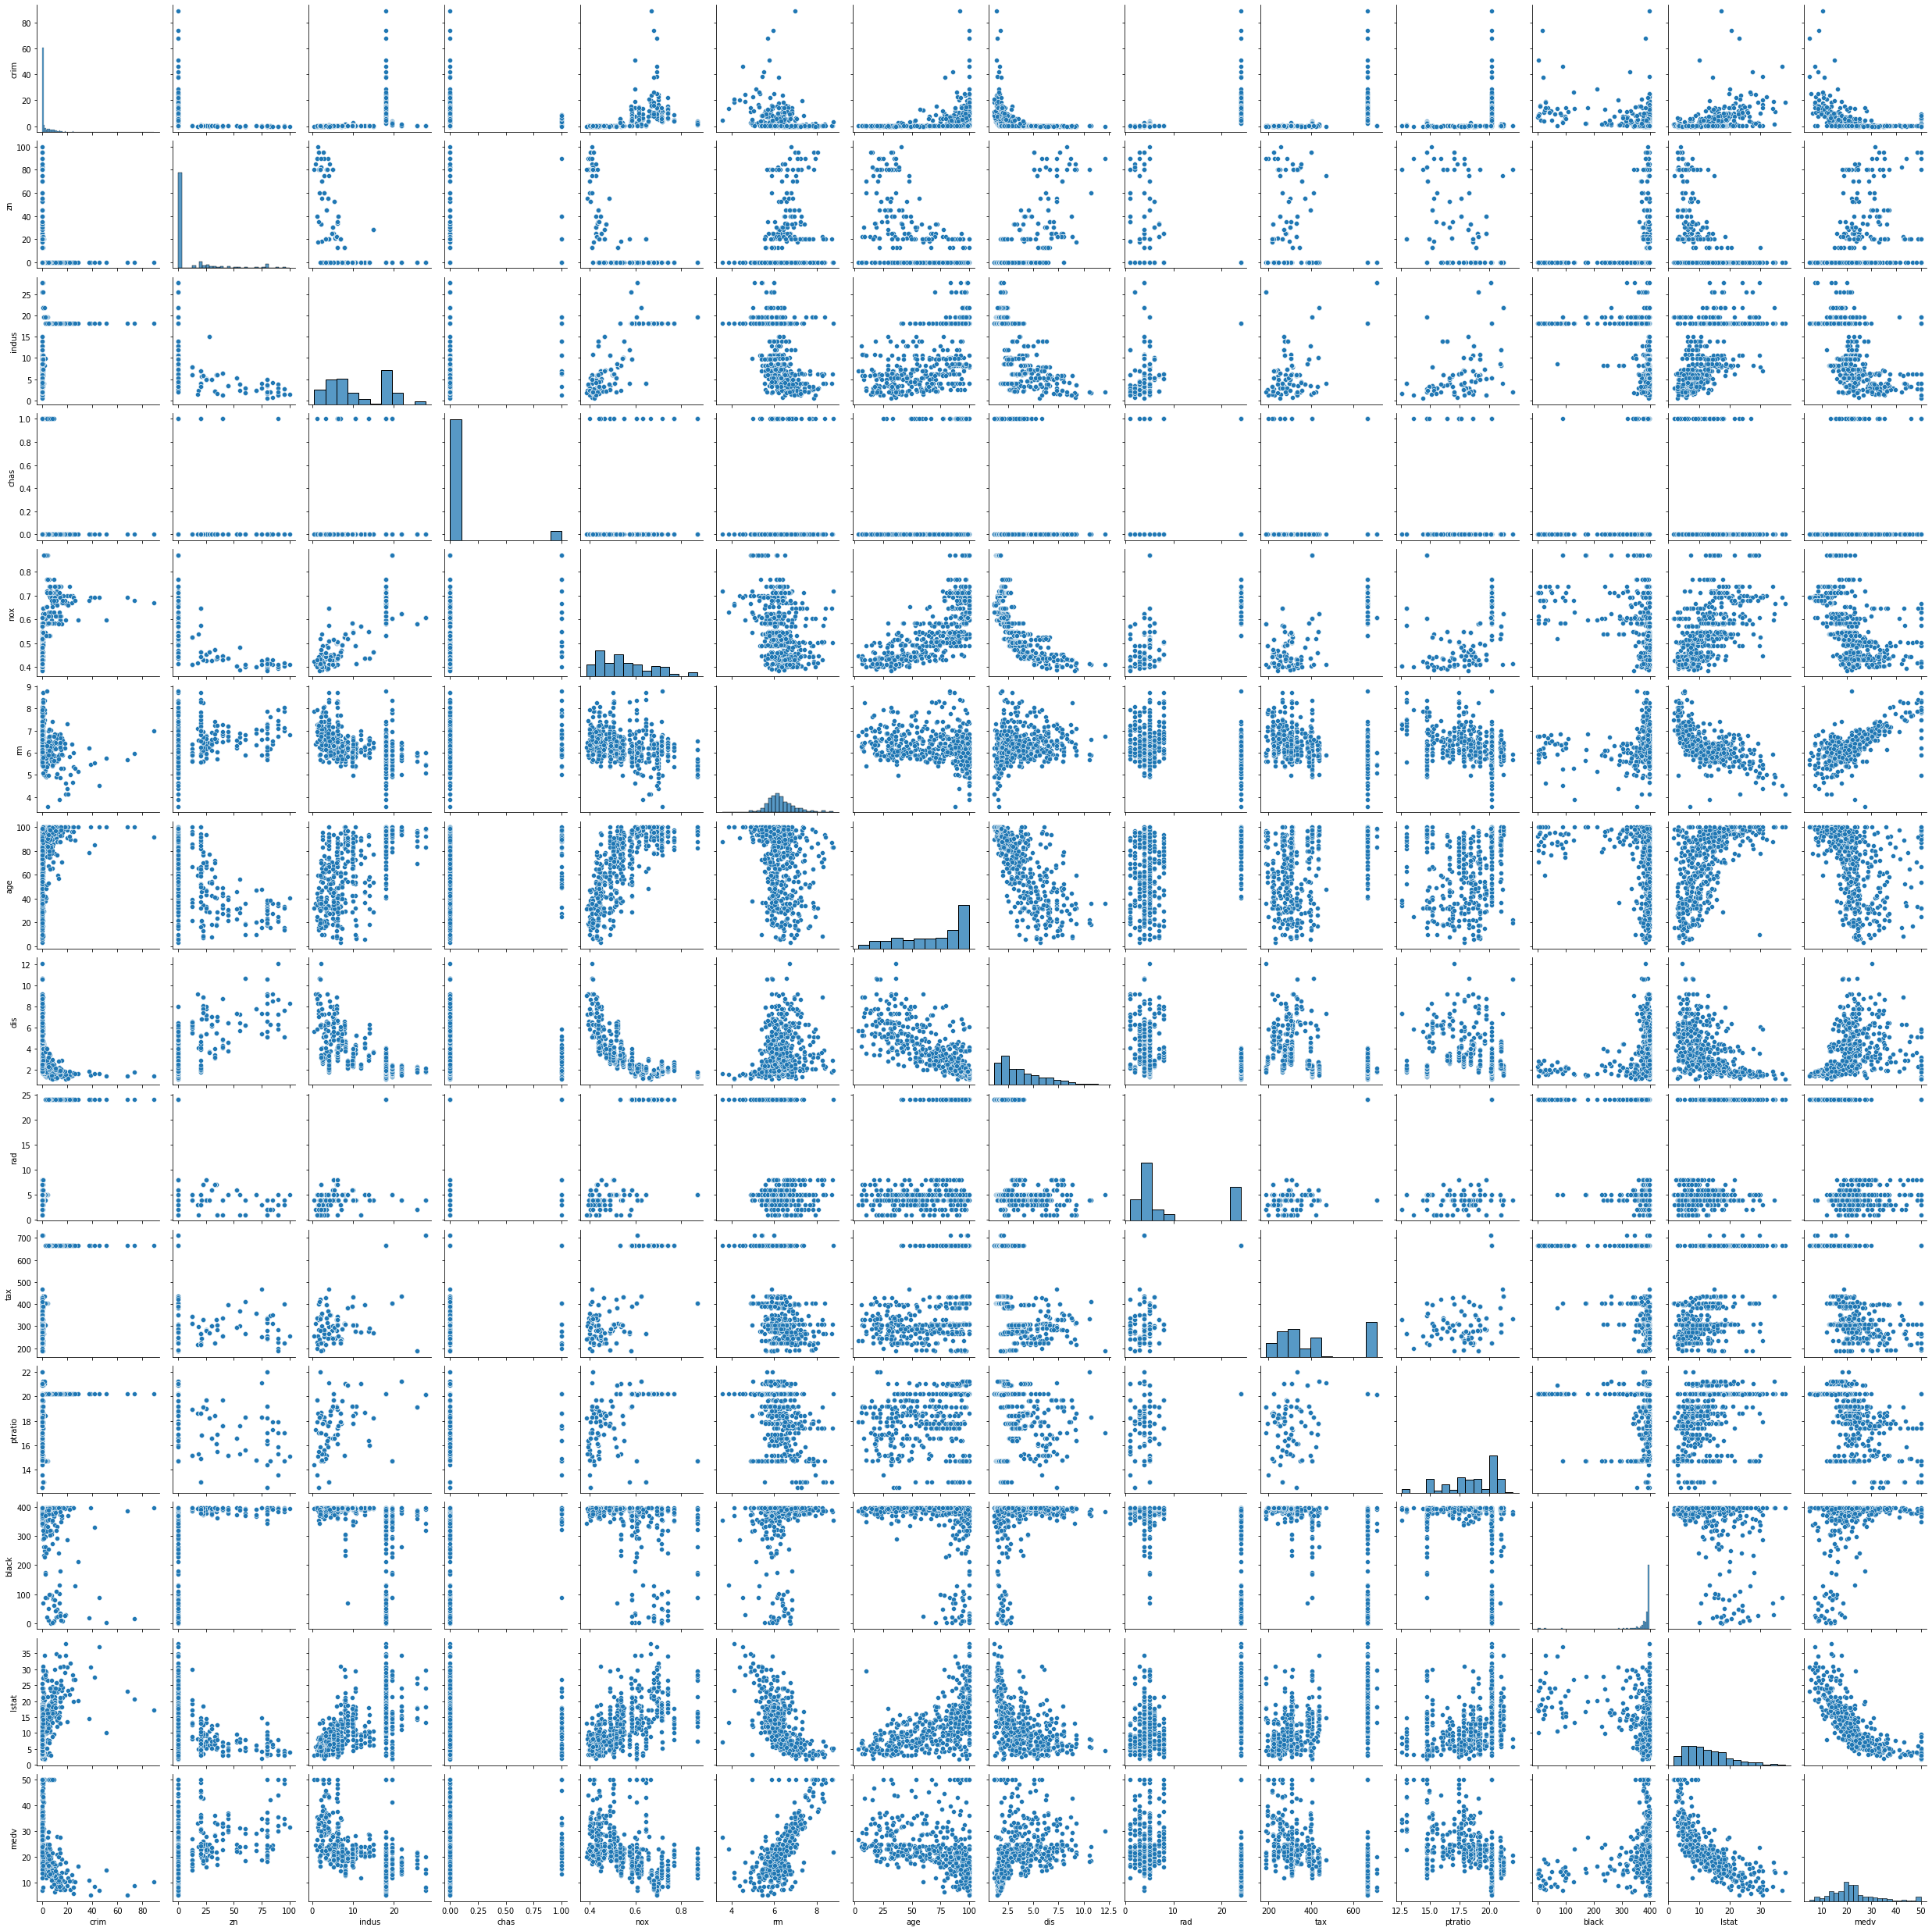

In [ ]:
sns.pairplot(df)

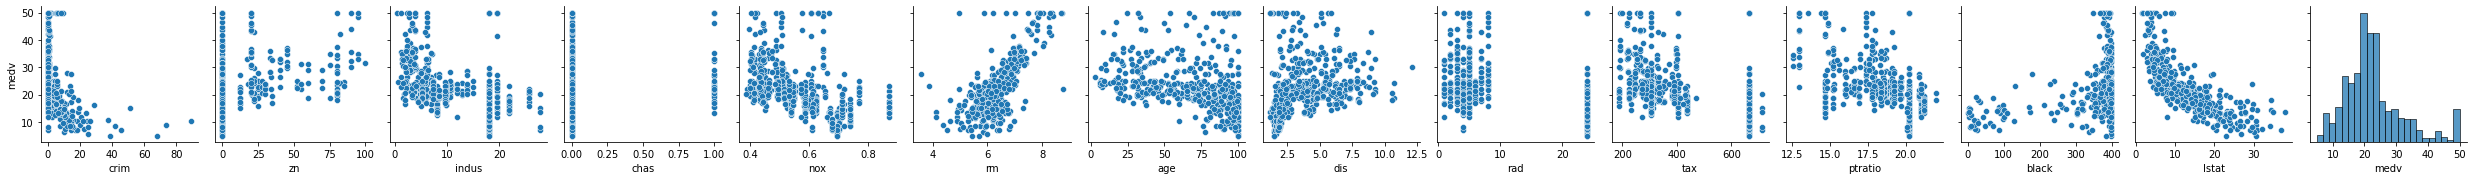

In [ ]:
sns.pairplot(df, x_vars=df.columns, y_vars=["medv"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


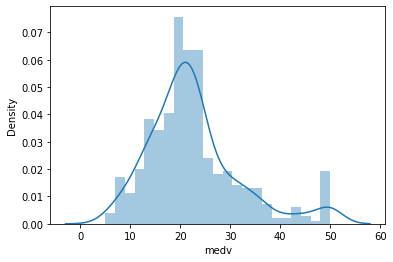

In [ ]:
sns.distplot(df['medv'])



---



## 4) To do feature selection

### 4.1) to check the correlation

In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


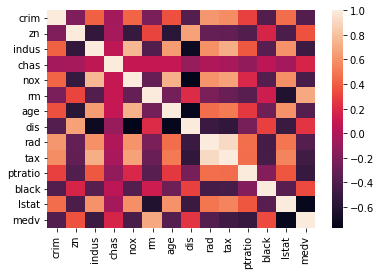

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr().sort_values("medv")[["medv"]]

,medv
lstat,-0.737663
ptratio,-0.507787
indus,-0.483725
tax,-0.468536
nox,-0.427321
crim,-0.388305
rad,-0.381626
age,-0.376955
chas,0.175260
dis,0.249929


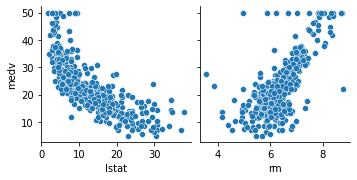

In [ ]:
sns.pairplot(df, x_vars=["lstat","rm"], y_vars=["medv"])

### 4.2) to select data

In [ ]:
X = df[["lstat","rm"]]
y = df["medv"]

In [ ]:
X

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64



---



## 5) To create a Linear Regression Model

### 5.1) to split train and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
78     21.2
160    27.0
124    18.8
167    23.8
272    24.4
Name: medv, Length: 203, dtype: float64

In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))

len(X_train) :  303
len(X_test) :  203
len(y_train) :  303
len(y_test) :  203


## 5.2) to train and create a linear regression model

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-0.70994265,  4.04113651])

In [ ]:
lm.intercept_

5.758638793520031

In [ ]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(X.columns)):
  print("", lm.coef_[i],"*",X.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

medv =
 -0.7099426464644831 * lstat    +
 4.041136510334898 * rm    +
 5.758638793520031




---



## 6) To evaluate the model

### 6.1) to predict from the test set

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
y_pred

array([35.47405915, 30.85664713, 20.0761843 , 19.69947079, 29.34298185,
       30.08040004, 37.73052039, 10.1308903 , 30.55761284,  8.67193517,
       27.86195528, 14.29159811, 19.50785006, 24.0062328 , 23.61300587,
       19.80972804,  8.27995474, 31.12076738, 27.81004958, 26.6476192 ,
       12.25462619, 18.40369273, 24.5323439 , 31.36672795, 32.11728675,
       20.94569697, 27.22428466, 20.82117036, 23.19602509, 30.45404545,
       23.93882596, 20.89407454, 33.67334871, 35.5331446 , 23.60311854,
       21.84789741, 19.25579434, 21.03876757,  5.59053515, 28.24814348,
       21.65784443, 25.79244458, 34.82583106, 12.73806041, 19.00005436,
       25.7085145 , 30.31917107, 17.51012821, 27.38113545, 28.75183426,
       32.13529252, 37.48422075, 19.2558434 , 21.84594153, 31.93313576,
       -4.47566061, 18.57637391, 16.09518168, 17.84513789, 18.81579362,
       31.43290302,  1.61197647, 15.09433426, 21.75536083, 12.26967851,
       26.25570437, 24.01778784, 19.99277663, 17.24228627, 20.49

### 6.2) to evaluate with some evaluation methods

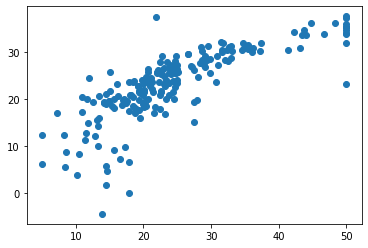

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)

RMSE =  6.23874238966677


In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")

MAPE =  21.168452979913976 %




---



## Exercises

1.   work with 5-fold cross-validation  (hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

2.   apply feature scaling (hint: https://scikit-learn.org/stable/modules/preprocessing.html)
3.   do feature engineering


### **Answer (Q1)**: 5-Fold Cross-Validation

#### step 1: Import useful libraries

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#### step 2: Init a K-Fold object

In [ ]:
X = df[["lstat","rm"]]
y = df["medv"]

In [ ]:
k = 5
kf = KFold(n_splits=k)

#### step 3: Do 5-Fold Cross-Validation

In [ ]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X):
  print("Round", round_num)
  print("  TRAIN:", train_index[0:10],"...")
  print("  TEST:", test_index[0:5],"...")

  # (5.1) to split train and test datasets
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  # (5.2) to train and create a linear regression model
  lm = LinearRegression()
  lm.fit(X_train,y_train)

  # (6.1) to predict from the test set
  y_pred = lm.predict(X_test)

  # (6.2) to evaluate with some evaluation methods
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("  RMSE = ", rmse)
  RMSEs.append(rmse)



  print("------------------------------------")
  round_num+=1

Round 1
  TRAIN: [102 103 104 105 106 107 108 109 110 111] ...
  TEST: [0 1 2 3 4] ...
  RMSE =  3.433481296406468
------------------------------------
Round 2
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [102 103 104 105 106] ...
  RMSE =  5.382579259868459
------------------------------------
Round 3
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [203 204 205 206 207] ...
  RMSE =  6.916932761257809
------------------------------------
Round 4
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [304 305 306 307 308] ...
  RMSE =  8.471749419076824
------------------------------------
Round 5
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [405 406 407 408 409] ...
  RMSE =  6.0506139436788136
------------------------------------


#### step 5: calculate the mean of errors

In [ ]:
print(RMSEs)

[3.433481296406468, 5.382579259868459, 6.916932761257809, 8.471749419076824, 6.0506139436788136]


In [ ]:
kfold_rmse = np.array(RMSEs).mean()

In [ ]:
print("K-Fold CV", "RMSE = ", kfold_rmse)

K-Fold CV RMSE =  6.051071336057674


### **Answer (Q2)**: Feature Scalling

#### step 1: Import useful libraries

In [ ]:
from sklearn import preprocessing

#### step 2: Data Preparation

In [ ]:
X = df[["lstat","rm"]]
y = df["medv"]

#### step 3: Check the space of data and try to scale

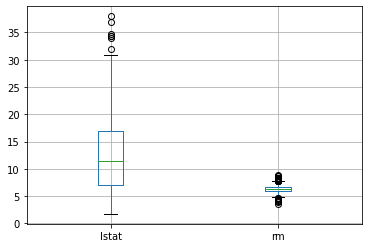

In [ ]:
X.boxplot()

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
print("type of X = ", type(X))
print("type of X_scaled = ", type(X_scaled))

type of X =  <class 'pandas.core.frame.DataFrame'>
type of X_scaled =  <class 'numpy.ndarray'>


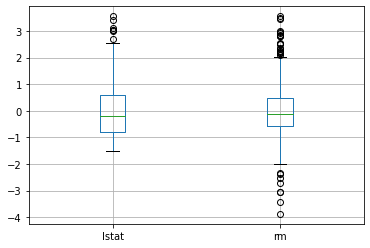

In [ ]:
pd.DataFrame(X_scaled, columns=["lstat","rm"]).boxplot()

#### step 4: Run the code

In [ ]:
k = 5
kf = KFold(n_splits=5)

In [ ]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X):

  # (5.1) to split train and test datasets
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  # To scale X_train
  scaler = StandardScaler().fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # (5.2) to train and create a linear regression model
  lm = LinearRegression()
  lm.fit(X_train_scaled,y_train)

  # (6.1) to predict from the test set
  y_pred = lm.predict(X_test_scaled)

  # (6.2) to evaluate with some evaluation methods
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("Round",round_num, "  RMSE = ", rmse)
  RMSEs.append(rmse)

Round 1   RMSE =  3.4334812964064674
Round 1   RMSE =  5.38257925986846
Round 1   RMSE =  6.916932761257809
Round 1   RMSE =  8.471749419076824
Round 1   RMSE =  6.050613943678815


#### step 5: Result

In [ ]:
import numpy as np
rmse_mean = np.array(RMSEs).mean()
print("Mean of RMSE = ", rmse_mean)

Mean of RMSE =  6.051071336057675


### **Answer (Q3)**: Do feature engineering

In [ ]:
X = df[["lstat","rm"]]
y = df["medv"]

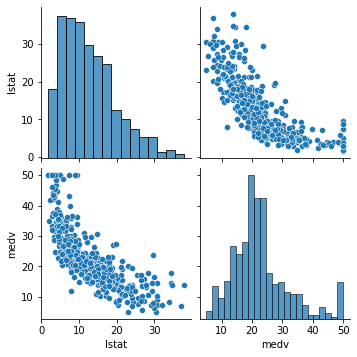

In [ ]:
sns.pairplot(df[["lstat", "medv"]])

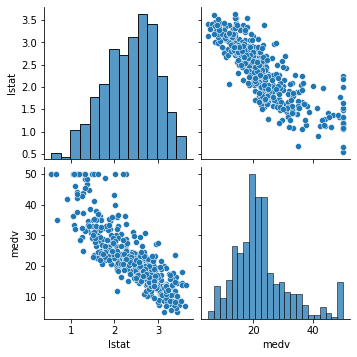

In [ ]:
sns.pairplot(pd.DataFrame({"lstat":df["lstat"].apply(np.log), "medv":y}))

In [ ]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X):
  print("Round", round_num)
  print("  TRAIN:", train_index[0:10],"...")
  print("  TEST:", test_index[0:5],"...")

  # (5.1) to split train and test datasets
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  # Feature engineering
  X_train["lstat"] = X_train["lstat"].apply(np.log)
  X_test["lstat"] = X_test["lstat"].apply(np.log)

  # To scale X_train
  scaler = preprocessing.StandardScaler().fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # (5.2) to train and create a linear regression model
  lm = LinearRegression()
  lm.fit(X_train_scaled,y_train)

  # (6.1) to predict from the test set
  y_pred = lm.predict(X_test_scaled)

  # (6.2) to evaluate with some evaluation methods
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  print("  RMSE = ", rmse)
  RMSEs.append(rmse)



  print("------------------------------------")
  round_num+=1

Round 1
  TRAIN: [102 103 104 105 106 107 108 109 110 111] ...
  TEST: [0 1 2 3 4] ...
  RMSE =  3.573765022124085
------------------------------------
Round 2
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [102 103 104 105 106] ...
  RMSE =  4.3961400739566745
------------------------------------
Round 3
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [203 204 205 206 207] ...
  RMSE =  6.628536351157885
------------------------------------
Round 4
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [304 305 306 307 308] ...
  RMSE =  7.486099523592622
------------------------------------
Round 5
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [405 406 407 408 409] ...
  RMSE =  5.097658364269636
------------------------------------


In [ ]:
print("meand of RMSE = ", np.array(RMSEs).mean())

meand of RMSE =  5.436439867020181


## To Deploy the Model for an Application

### Train the Whole Dataset

In [ ]:
df = pd.read_csv('https://rathachai.github.io/DA101/data/boston.csv')

In [ ]:
# Feature engineering

df["lstat"] = df["lstat"].apply(np.log)

In [ ]:
X = df[["lstat","rm"]]
y = df["medv"]

In [ ]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

### Check the Model

In [ ]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(X.columns)):
  print("", lm.coef_[i],"*",X.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

medv =
 -9.68546329390055 * lstat    +
 3.597701119720005 * rm    +
 22.886466246629507


### Play with the Model

In [ ]:
#@title Set Your Parameters { run: "auto" }
lstat_val =7 #@param {type:"slider", min:0, max:30, step:0.5}
rm_val =6.5 #@param {type:"slider", min:0, max:10, step:0.5}

medv_val = lm.predict([[np.log(lstat_val),rm_val]])

print("medv = ", round(medv_val[0],2), "x 1000 Dollas")

medv =  19.42 x 1000 Dollas


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Note

In [ ]:
X = df[["lstat","rm"]]
y = df["medv"]

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

model = LinearRegression()
model.fit(X_scaled,y)

In [ ]:
print("Fatures :", X.columns.tolist())
print("Coef :", model.coef_)
print("Intercept :", model.intercept_)

In [ ]:
print("Linear Regression Model")
print("")
print(y.name, "=")
for i in range(0,len(X.columns)):
  print("", model.coef_[i],"*",X.columns[i],"   +")
print("", model.intercept_)



---
https://rathachai.creatier.pro/

## つづく